In [45]:
import numpy as np
import scipy.io.wavfile as wav
from scipy import signal
import wave
import matplotlib.pyplot as plt

In [6]:


# wavファイルの読み込み
sampling_rate, data_stereo = wav.read('./test/kitasota_2.wav')

# ステレオデータをモノラルに変換
data_mono = np.mean(data_stereo, axis=1, dtype=np.int16)

# ノイズ除去のためのパラメータ設定
frame_size = 512  # フレームサイズ
hop_size = 256  # フレームのオーバーラップサイズ
window = signal.hann(frame_size)  # ハニング窓

# スペクトルサブトラクション法によるノイズ除去
output_data = np.zeros_like(data_mono)  # 出力データの初期化
# 出力データのデータ型を修正
output_data = output_data.astype(np.float64)

for i in range(0, len(data_mono) - frame_size, hop_size):
    # フレームごとにノイズ除去を行う
    frame = data_mono[i:i + frame_size] * window  # 窓掛け
    spectrum = np.fft.fft(frame)  # スペクトル計算

    # ノイズスペクトルの推定（ここでは簡易的に、最初のフレームをノイズフロアとして利用）
    if i == 0:
        noise_spectrum = np.abs(spectrum)

    # ノイズスペクトルを用いてノイズ除去
    magnitude = np.abs(spectrum)
    magnitude_masked = np.maximum(magnitude - noise_spectrum, 0)  # ノイズマスキング
    spectrum_denoised = magnitude_masked * np.exp(1j * np.angle(spectrum))  # マスク適用
    frame_denoised = np.real(np.fft.ifft(spectrum_denoised))  # 逆フーリエ変換

    # 出力データにフレームを追加
    output_data[i:i + frame_size] += frame_denoised

# 出力データを正規化
output_data = output_data / np.max(np.abs(output_data))


# 出力データをwavファイルとして保存
wav.write('./test/kitasota_2_noise.wav', sampling_rate, (output_data * np.iinfo(np.int16).max).astype(np.int16))



In [8]:
import librosa
import soundfile as sf
y, sr = librosa.core.load('./test/kitasota_2.wav', sr=22050, mono=True) # 22050Hz、モノラルで読み込み
sf.write("./test/kitasota_2_ds.wav", y, sr, subtype="PCM_16") 

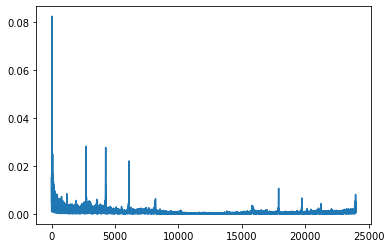

In [16]:
import numpy as np
import wave
import matplotlib.pyplot as plt
filename = "./videos/kill_audio_test_trim.wav"
w = wave.open(filename, 'rb')
data = w.readframes(w.getnframes())
w.close()
fs = w.getframerate()
s = (np.frombuffer(data, dtype="int16") / 32767.0)[0:fs]
F = np.fft.fft(s)
F_abs = np.abs(F)
F_a = F_abs / fs * 2
F_a[0] = F_abs[0] / fs
plt.plot(F_a[:int(fs/2)+1])
plt.show()

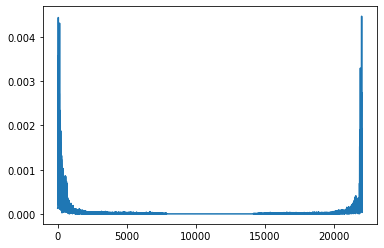

In [13]:
import numpy as np
import wave
import matplotlib.pyplot as plt
filename = "./videos/kill_audio_test_trim.wav"
w = wave.open(filename, 'rb')
data = w.readframes(w.getnframes())
w.close()
fs = w.getframerate()
s = (np.frombuffer(data, dtype="int16") / 32767.0)[0:fs]
F = np.fft.fft(s)
F_abs = np.abs(F)
F_a = F_abs / fs * 2
F_a[0] = F_abs[0] / fs
plt.plot(F_a[:int(fs/2)+1])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-11-d9aebf719dbf>:13: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


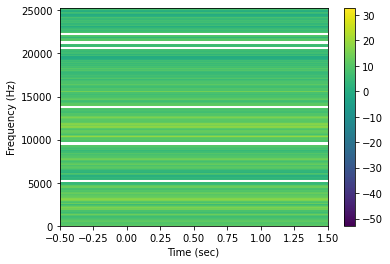

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
 
# 音声ファイルの読み込み
sample_rate, samples = wavfile.read("./videos/kill_audio_test_trim.wav")
 
# FFTをかけて周波数スペクトルを取得
frequencies, times, spec = spectrogram(samples, fs=sample_rate)
 
# スペクトログラム画像の描画
Z = 10. * np.log10(spec)
plt.imshow(Z, origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

<ipython-input-12-554e0b289738>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read("./videos/audio_fake.wav")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-12-554e0b289738>:13: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


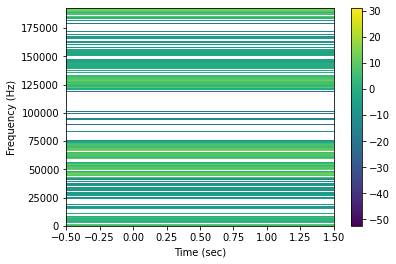

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
 
# 音声ファイルの読み込み
sample_rate, samples = wavfile.read("./videos/audio_fake.wav")
 
# FFTをかけて周波数スペクトルを取得
frequencies, times, spec = spectrogram(samples, fs=sample_rate)
 
# スペクトログラム画像の描画
Z = 10. * np.log10(spec)
plt.imshow(Z, origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

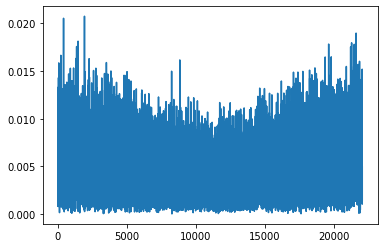

106.6459288817703


In [44]:
import numpy as np
import wave
import matplotlib.pyplot as plt
filename = "./test/kitasota_2.wav"
w = wave.open(filename, 'rb')
data = w.readframes(w.getnframes())
data = data[80295027+44100*1:80295027+44100*3]
w.close()
fs = w.getframerate()
s = (np.frombuffer(data, dtype="int16") / 32767.0)[0:fs]
F = np.fft.fft(s)
F_abs = np.abs(F)
F_a = F_abs / fs * 2
F_a[0] = F_abs[0] / fs
plt.plot(F_a[:int(fs/2)+1])
plt.show()

avg = np.average(np.abs(F))
print(avg)

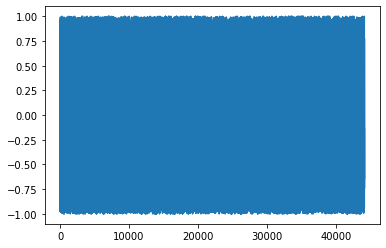

0.500266129706987
0.5778305295127085


In [35]:
import numpy as np
import wave
import matplotlib.pyplot as plt
filename = "./test/kitasota_2.wav"
w = wave.open(filename, 'rb')
data = w.readframes(w.getnframes())
data = data[80295027:80295027+44100*5]
w.close()
fs = w.getframerate()
s = (np.frombuffer(data, dtype="int16") / 32767.0)[0:fs]
plt.plot(s)
plt.show()

avg = np.average(np.abs(s))
print(avg)
std = np.std(s)
print(std)

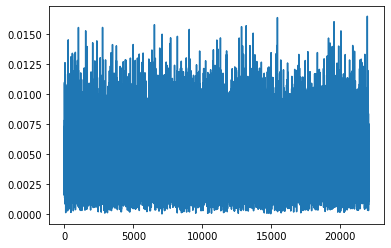

107.02564581654592


In [43]:
import numpy as np
import wave
import matplotlib.pyplot as plt
filename = "./test/kitasota_2.wav"
w = wave.open(filename, 'rb')
data = w.readframes(w.getnframes())
# data = data[96699006:96699006+44100*5]    # 全滅
# data = data[29205906:29205906+44100*5]    # ポッド
data = data[122704507:122704507+44100*5]
w.close()
fs = w.getframerate()
s = (np.frombuffer(data, dtype="int16") / 32767.0)[0:fs]
F = np.fft.fft(s)
F_abs = np.abs(F)
F_a = F_abs / fs * 2
F_a[0] = F_abs[0] / fs
plt.plot(F_a[:int(fs/2)+1])
plt.show()

avg = np.average(np.abs(F))
print(avg)

In [60]:
import wave
filename = "./test/kitasota_2.wav"
w = wave.open(filename, 'rb')
data = w.readframes(w.getnframes())
# data = data[96699006:96699006+44100*5]    # 全滅
# data = data[29205906:29205906+44100*5]    # ポッド
data = data[122704507:122704507+44100*5]    # 不正全滅
w.close()

fs = w.getframerate()
s = (np.frombuffer(data, dtype="int16") / 32767.0)[0:fs]
# plt.plot(s)

frq, t, Pxx = signal.stft(s, fs=fs) #周波数、時間、強さの3つの情報が帰ってくる
# Pxx = 10 * np.log(np.abs(Pxx)) #対数表示に直す
# plt.pcolormesh(t, frq, Pxx, cmap = 'jet')
# plt.show()

avg = np.average(np.abs(s))
print(avg)
std = np.std(s)
print(std)

0.49760984500818567
0.57491831336635


In [58]:
from scipy.io import wavfile
wave_, fs = librosa.load('./test/kitasota_2.wav', sr=None)
wave_ = wave_[122704507:122704507+44100*5]
wave_trimmed, index = librosa.effects.trim(wave_, top_db=25)
wave_filtered = signal.wiener(wave_trimmed)


Pxx, freqs, bins, im = plt.specgram(wave_filtered, Fs=fs, cmap = 'jet', mode='magnitude')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2))
plt.show()

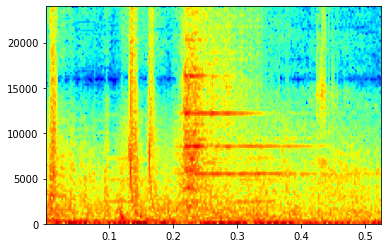

In [64]:
from scipy.io import wavfile
wave_, fs = librosa.load('./videos/kill_audio_test_trim.wav', sr=None)
wave_trimmed, index = librosa.effects.trim(wave_, top_db=25)
wave_filtered = signal.wiener(wave_trimmed)


Pxx, freqs, bins, im = plt.specgram(wave_filtered, Fs=fs, cmap = 'jet', mode='magnitude')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2))
plt.show()

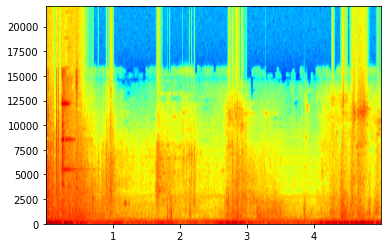

In [63]:
from scipy.io import wavfile
wave_, fs = librosa.load('./test/kitasota_2.wav', sr=None)
wave_ = wave_[80295027:80295027+44100*5]
wave_trimmed, index = librosa.effects.trim(wave_, top_db=25)
wave_filtered = signal.wiener(wave_trimmed)


Pxx, freqs, bins, im = plt.specgram(wave_filtered, Fs=fs, cmap = 'jet', mode='magnitude')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2))
plt.show()

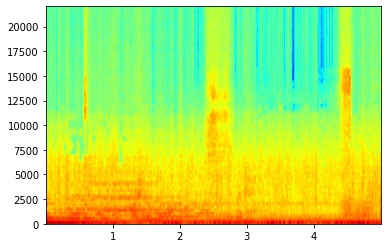

In [62]:
from scipy.io import wavfile
wave_, fs = librosa.load('./test/kitasota_2.wav', sr=None)
wave_ = wave_[122704507:122704507+44100*5]
wave_trimmed, index = librosa.effects.trim(wave_, top_db=25)
wave_filtered = signal.wiener(wave_trimmed)


Pxx, freqs, bins, im = plt.specgram(wave_filtered, Fs=fs, cmap = 'jet', mode='magnitude')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2))
plt.show()